In [1]:
pip install pandas openpyxl xlrd seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
print(os.path.exists('../data/Sample - Superstore.xls'))

#Utiliser pour retoruner une valeur bool pour savoir s'il sagit correct de votre ficheir de données


True


In [3]:


import pandas as pd

# Charger le fichier Excel (remplace 'fichier.xlsx' par le nom réel de ton fichier)
df = pd.read_excel("../data/Sample - Superstore.xls")

# Afficher les premières lignes
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Vérifier les informations du dataset
df.info() # Type de données, valeurs manquantes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
# Vérifier les statistiques descriptives des variables numériques
df.describe()




,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [6]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())




Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
data_copy = df.copy()  # Copie de sauvegarde


In [8]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes (optionnel)
df_clean = df.dropna()

# Remplir les valeurs manquantes (uniquement pour les colonnes numériques)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remplir les valeurs manquantes pour les colonnes qualitatives avec la valeur la plus fréquente (mode)
df.fillna(df.mode().iloc[0], inplace=True)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# Vérifier les doublons
print(df.duplicated().sum())

# Supprimer les doublons
df_clean = df.drop_duplicates()


0


In [10]:
# Vérifier le nombre de doublons dans l'ensemble des données
print("Nombre de doublons :", df.duplicated().sum())

# Afficher les premières lignes des doublons
#print(df[df.duplicated()].head())


Nombre de doublons : 0


In [11]:
# Supprimer les doublons et mettre à jour le DataFrame
df_clean = df.drop_duplicates()

# Vérifier à nouveau après suppression
print("Nombre de doublons après suppression :", df_clean.duplicated().sum())


Nombre de doublons après suppression : 0


In [12]:
# Identifier les colonnes qualitatives (catégoriques)
qualitatives = df.select_dtypes(include=['object']).columns.tolist()
print("Variables qualitatives :", qualitatives)

# Identifier les colonnes quantitatives (numériques)
quantitatives = df.select_dtypes(include=['number']).columns.tolist()
print("Variables quantitatives :", quantitatives)


Variables qualitatives : ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Variables quantitatives : ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


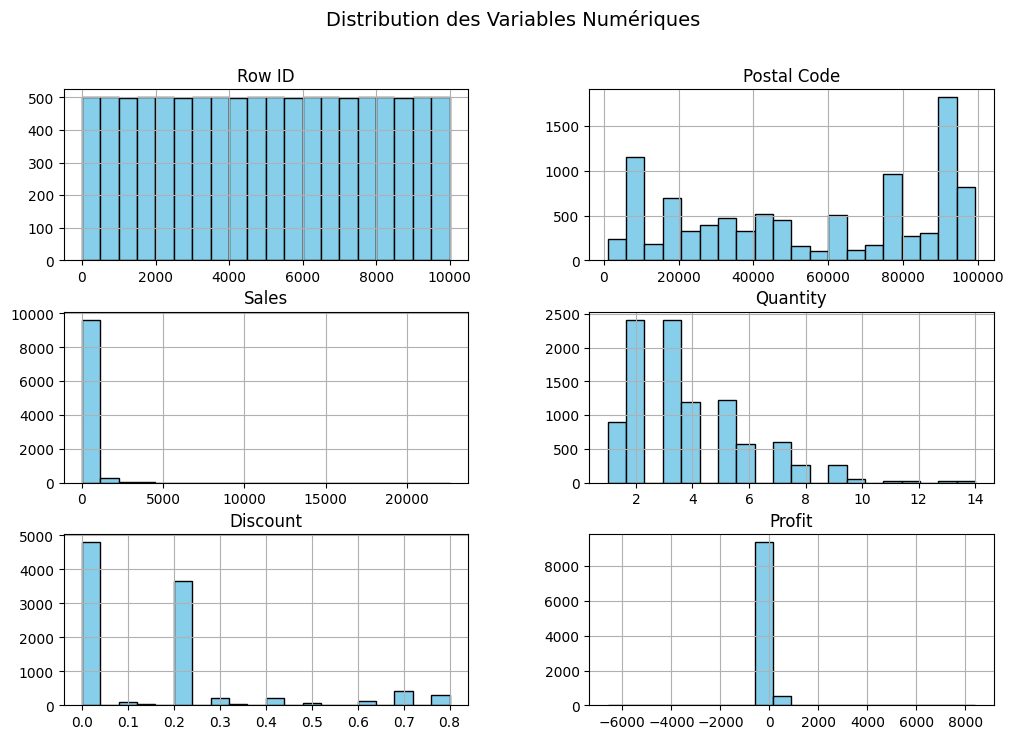

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définition des variables quantitatives
quantitatives = df.select_dtypes(include=['number']).columns.tolist()

# Tracer un histogramme pour chaque variable numérique
df[quantitatives].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution des Variables Numériques", fontsize=14)
plt.show()


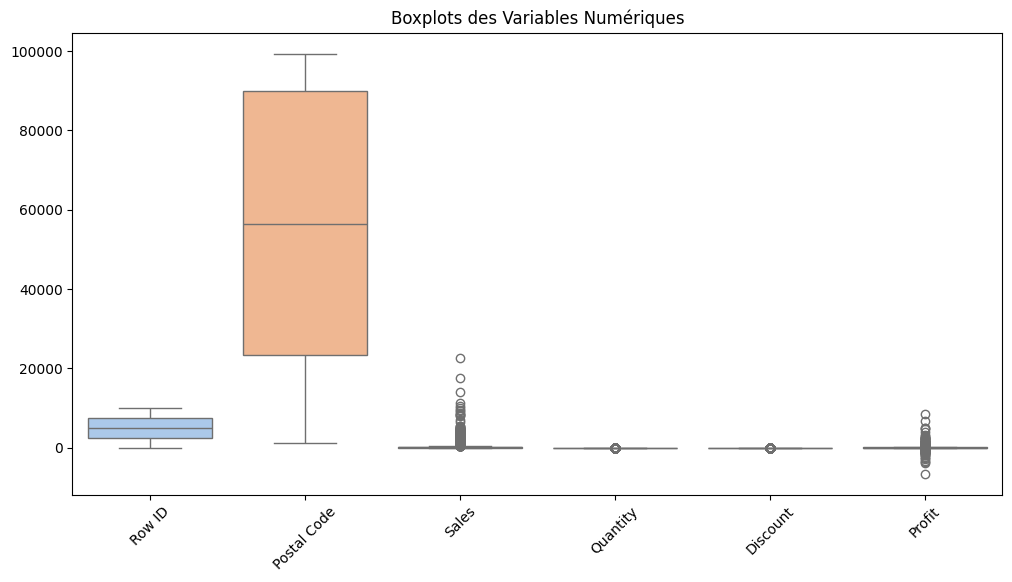

In [20]:
# Tracer un boxplot pour chaque variable quantitative
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[quantitatives], palette="pastel")
plt.title("Boxplots des Variables Numériques")
plt.xticks(rotation=45)
plt.show()
